## Método do Gradiente com Passo Fixo
Neste exemplo vamos usar o método do gradiente para minimizar

$$ f(x,y) = x^2 + 10y^2 $$

Primeiro, vamos calcular $$\Nabbla f(x,y) = (2x, 20y)$$

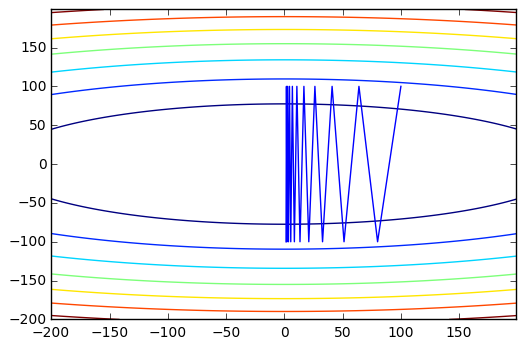

In [6]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np


def f(x, y):
    return x**2 + 10*y**2


def grad_f(x, y):
    return np.array([2*x, 20*y])


def grad_descent(x0, y0, max_iter=50):
    if np.linalg.norm(grad_f(x0, y0)) == 0.0:
        return []

    xk_seq = []
    yk_seq = []

    iter = 0
    xk = x0
    yk = y0
    while iter < max_iter and np.linalg.norm(grad_f(xk, yk)) > 10e-2:
        dk = -grad_f(xk, yk)
        lk = 0.1
        xk_seq += [xk]
        yk_seq += [yk]
        xk += lk * dk[0]
        yk += lk * dk[1]
        iter += 1

    return xk_seq, yk_seq


xk, yk = grad_descent(100, 100, max_iter=20)

graph_range = [-200, 200]

X = np.arange(graph_range[0], graph_range[1], 1)
Y = np.arange(graph_range[0], graph_range[1], 1)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure()
plt.contour(X, Y, Z)
plt.plot(xk, yk)
plt.show()